<a href="https://colab.research.google.com/github/roapple10/Python-learning-note/blob/main/%E5%93%81%E7%89%8C%E8%81%B2%E9%87%8F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install snownlp

     |████████████████████████████████| 37.6 MB 286 kB/s 
  Created wheel for snownlp: filename=snownlp-0.12.3-py3-none-any.whl size=37760963 sha256=fa126621a466716b383c0184a064f5d0b2938dd6e18dd2a73d20f158b3d9c261
  Stored in directory: /root/.cache/pip/wheels/4a/7a/fe/a5747434679b22a95c93bcf9fa49a988f5d9be56366bdf6c79
Successfully built snownlp


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# 一般繪圖套件
import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager
import seaborn as sns

In [9]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-04-27 07:25:10--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 173.194.215.101, 173.194.215.100, 173.194.215.113, ...
Connecting to drive.google.com (drive.google.com)|173.194.215.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sr63b1ob332gm1l45hknl08617lved9r/1651044300000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2022-04-27 07:25:14--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/sr63b1ob332gm1l45hknl08617lved9r/1651044300000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.98.132, 2607:f8b0:400c:c1a::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|142.250.98

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 127: unexpected end of data


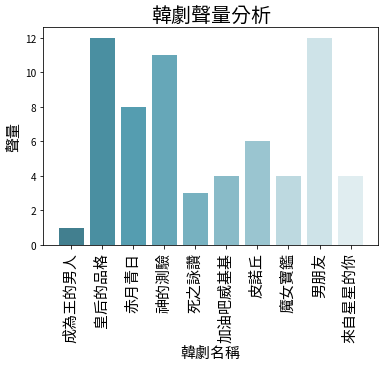

In [10]:
# %load 品牌聲量分析.py
#!/usr/bin/env python3
"""
Created on Tue Feb 25 09:18:30 2020
https://medium.com/marketingdatascience/%E5%B8%82%E5%A0%B4%E8%AA%BF%E6%9F%A5%E5%BE%88%E8%8A%B1%E9%8C%A2-%E8%87%AA%E5%B7%B1%E4%BE%86%E5%81%9A%E8%81%B2%E9%87%8F%E5%88%86%E6%9E%90%E5%90%A7-56e75c001be0

@author: ivan
"""

import jieba.analyse
import pandas as pd
import jieba
import numpy as np
from snownlp import SnowNLP
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/品牌聲量分析/dict.txt.big')
colrogroup = ['#427f8f','#4a8fa1','#559db0','#66a7b8','#77b1c0','#89bbc8','#9ac5d0','#bdd9e0','#cee3e8','#e0edf0']
colrogroup2 = ['#cd0003','#e60003','#ff0004','#ff1a1d','#ff3436','#ff4d4f','#ff6768','#ff8181','#ff9a9b','#ffb4b4']
# 無意義字元列表，可以自行新增
removeword = ['span','class','f3','https','imgur','h1','_   blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','<','>','，','。','？','-','閒聊','・','/',
              ' ','=','\"','\n','」','「','！','[',']','：','‧','╦','╔','╗','║'
              ,'╠','╬','╬',':','╰','╩','╯','╭','╮','│','╪','─','《','》','_'
              ,'.','、','（','）',' ','*','※','~','○','"','"','～','@','＋','\r'
              ,'▁',')','(','-','═','?',',','!','…','&',';','『','』','#','＝'
              ,'\l']
#設定你關心的影劇名稱
movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗','死之詠讚',
         '加油吧威基基','皮諾丘','魔女寶鑑','男朋友','來自星星的你']
# 讀入爬蟲資料
KoreaDrama=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/品牌聲量分析/KoreaDrama_re.csv',encoding='utf-8',engine='python',error_bad_lines=False) #開啟檔案

#所有文章和標題都串在一起
thearticle = KoreaDrama['標題'] + KoreaDrama['內容']

# 移除無意義字元列
for word in removeword:
    thearticle = thearticle.replace(word,'')

#搜尋每個句子中，有出現該品牌的名稱，就+1
tatal_movie = []
for mov in movie:
    count = 0
    for art in thearticle:
        if mov in art:
            count = count +1
    tatal_movie.append(count)
    
    
# 繪畫
plt.bar(movie, tatal_movie, color=colrogroup) #給予線標籤
plt.xticks(fontsize=15,rotation=90) 
plt.xlabel('韓劇名稱', fontsize=15)
plt.ylabel('聲量', fontsize=15)
plt.title('韓劇聲量分析', fontsize=20)
plt.show()
